# Student Performance Indicator

### Life Cycle of This Project:

- Understanding the Problem Statement
- Data Collection
- Perform Data Checks
- Exploratory Data Analysis
- Data Pre-processing
- Model Training
- Choosing Best Performing Model

### 1. Problem Statement
The goal of this project is to understand the influence of the parents background, test preparation, and various other variables on the students performance. 

### 2. Data Collection
- Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

- The dataset is designed for data science training and is fictional. It includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

- Consists of 8 columns and 1000 rows.

### 2.1 Import Necessary Libraries

In [3]:
import warnings
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

### 2.2 Read the dataset as a dataframe

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### 2.3 Dataset Information

- Gender: Sex of a student (Male/Female)
- Race/ethnicity: Ethnicity of a student (Group A,B,C,D,E)
- Parental level of education : parents' final education (bachelor's degree,some college,master's degree,associate's degree,high school)
- Lunch : having lunch before test (standard or free/reduced)
- Test preparation course : complete or not complete before test
- Math score
- Reading score
- Writing score

### 3. Perform Data Checks

- Check Missing values
- Check Duplicates
- Check Datatypes
- Check the number of unique values in each column
- Check statistics of the  dataset
- Check various categories present in the different categorical column

#### 3.1 Checking Missing Values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in this dataset. If there were any, we would either drop those values or use Imputation.

#### 3.2 Checking Duplicate Values

In [10]:
df.duplicated().sum()

0

There are no duplicate values in this dataset. If there were any, we would drop them using df.drop_duplicates()

#### 3.3 Checking the datatypes of columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values in each column

In [19]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Generally, the higher the number of unique values of a certain column, the higher the chance of it being continuous variable.

#### 3.5 Checking statistics of the dataset.

In [20]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from the statistics:
- The students' average performance on all three courses is similar. The mean of all three courses is close and between 66 and 68.1

- The standard deviation is also very close of all three courses.

- Reading score has the highest minimum of 17

#### 3.6 Checking various categories in each column.

In [24]:
for col in df.columns:
    if col not in ['math score', 'reading score', 'writing score']:
        print(f'Categories in {col}: {df[col].unique()}')

Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


### 4. Exploring and Visualization Data 

To make data exploration and visualization more informative, we can perform feature engineering by adding two more columns to gain more insights, namely, 'Total score' and 'Average score'.

In [25]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average Score'] = df['Total Score'] / 3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [37]:
print('Number of students having more than or equal to 200 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200])))

print('Number of students having more than or equal to 70 average marks: {0}'.format(
    len(df[df['Average Score'] >= 70])))

Number of students having more than or equal to 200 total marks: 556
Number of students having more than or equal to 70 average marks: 459


In [40]:
print('Number of females having more than or equal to 70 marks in maths: {0}'.format(
    len(df[df['math score'] >= 70][df['gender'] == 'female'])))

print('Number of males having more than or equal to 70 marks in maths: {0}'.format(
    len(df[df['math score'] >= 70][df['gender'] == 'male'])))

Number of females having more than or equal to 70 marks in maths: 178
Number of males having more than or equal to 70 marks in maths: 231


We can see that males have performed better in mathematics compared to females.

In [43]:
print('Number of females having more than or equal to 250 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200][df['gender'] == 'female'])))

print('Number of males having more than or equal to 250 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200][df['gender'] == 'male'])))


Number of females having more than or equal to 250 total marks: 317
Number of males having more than or equal to 250 total marks: 239


However, in terms of total score, females have outperformed males.

#### 4.1 Visualizing Data

Let us visualize average score distribution and make some conclusions.

- Histogram
- Kernel Distribution Function

[]

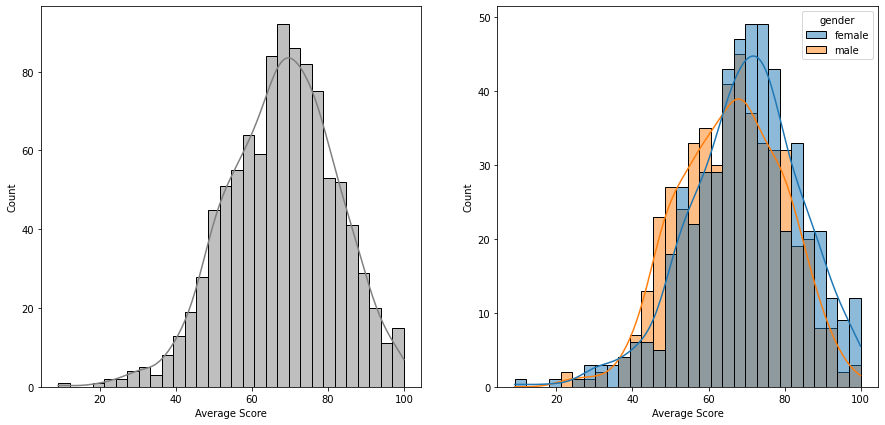

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average Score', bins=30, kde=True, color='grey')
plt.subplot(122)
sns.histplot(data=df, x='Average Score', bins=30, kde=True, hue='gender')
plt.plot()

- First, the majority of students have an average score that is between ~ 60 and 80.
- Second, we can see in the second graph that more females have gotten higher average scores than boys.

Visualize total score distribution

[]

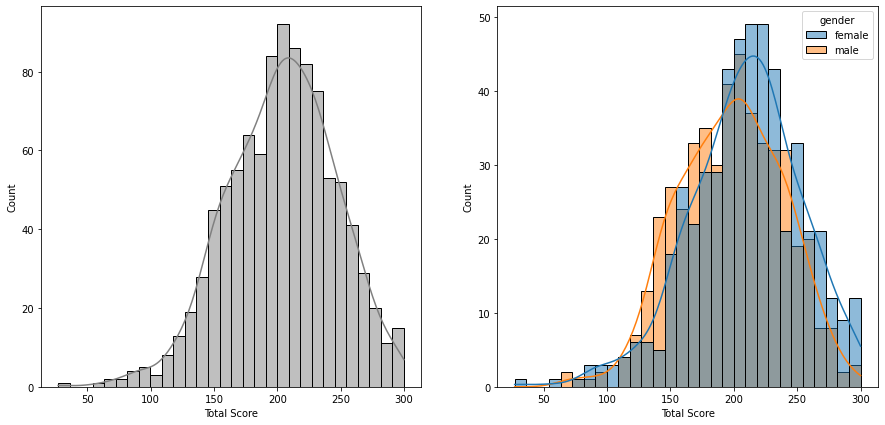

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='grey')
plt.subplot(122)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, hue='gender')
plt.plot()

- The majority of students have a total score that is between ~ 180 and 240.
- We can see in the second graph that more females have gotten higher total scores than boys.

- Female students tend to perform better overall compared to male students in this case.

Let us now see the average score distribution based on the variable lunch.

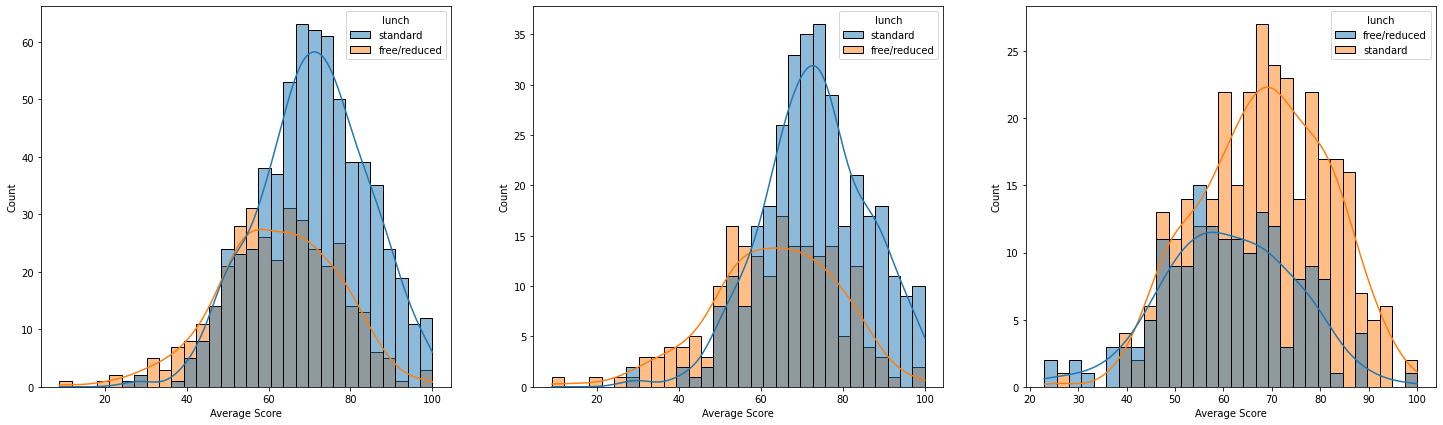

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(131)
sns.histplot(data=df, x='Average Score', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='Average Score', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],
             x='Average Score', bins=30, kde=True, hue='lunch')
plt.show()

Insights:
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

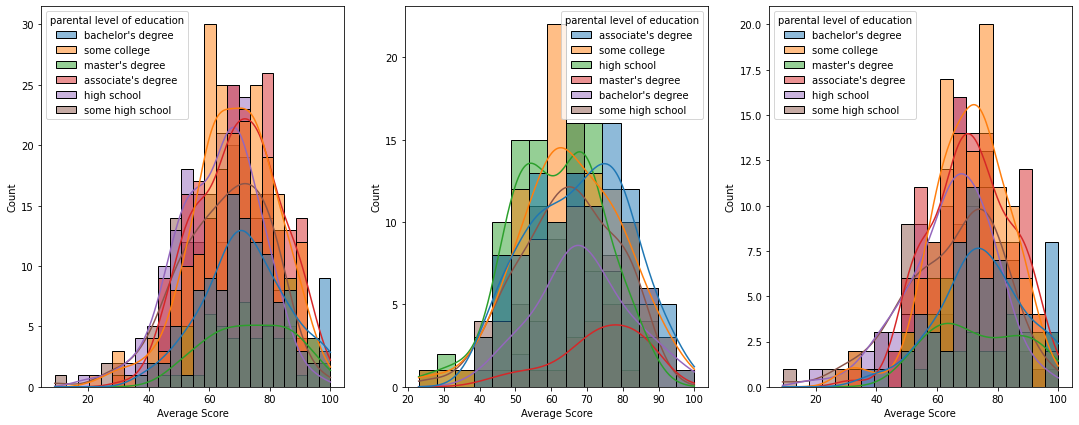

In [59]:
plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average Score', kde=True,
                  hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'], x='Average Score',
                  kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'], x='Average Score',
                  kde=True, hue='parental level of education')
plt.show()

Insights:
- First graph shows that having some sort of associate of bachelors degree helped students perform better.
- Second graph shows that male students tend to perform better if they have associate or bachelors degree.
-  Third graph shows that higher education doesn't really improve the performance of female students. Although, majority of females who got an average score of 100 or closer to 100 have either associate or bachelors degree.

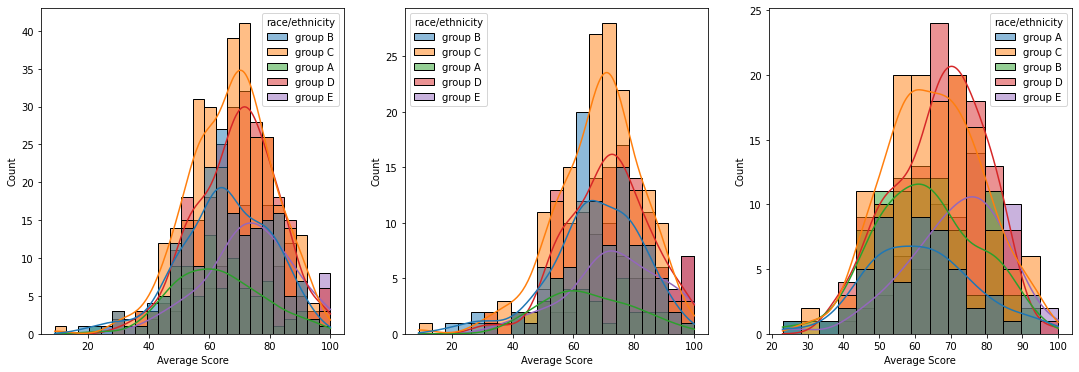

In [60]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average Score', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'],
                  x='Average Score', kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'],
                  x='Average Score', kde=True, hue='race/ethnicity')
plt.show()


Insights:
- Group E and D tends to perform better than other groups regardless of the sex.
- Group A and B tend to perform poorly irrespective of their gender.

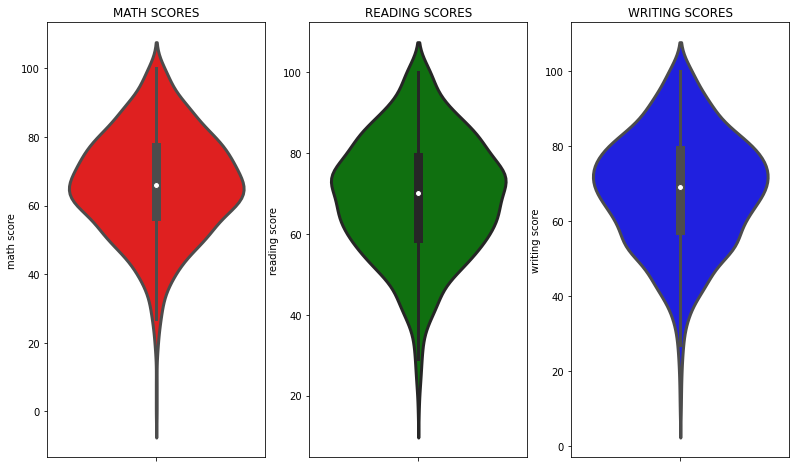

In [61]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

Insights:
- Most of the students have scores in between 60 and 80 in maths.
- Most of the students have scores in between 50 and 80 in reading and writing.